# Standard Problem for materials with Dzyaloshinskii-Moriya interaction


## Google Colab Link

The demo can be run on Google Colab without any local installation.
Use the following [link](https://colab.research.google.com/drive/1-5KuQ9GB3UeIfw4hCBN58fj2NvlXD28W) to try it out.

In [1]:
!pip install -q magnumnp numpy==1.22.4

## Run Demo:

In [2]:
from magnumnp import *
import torch
import numpy as np
import os
import math

Timer.enable()

n  = (100, 1, 1)
dx = (1e-9, 1e-9, 1e-9)
origin = (-n[0]*dx[0]/2., -n[1]*dx[1]/2., -n[2]*dx[2]/2.,)

mesh = Mesh(n, dx, origin)
state = State(mesh)
state.material = {
    "alpha": 1.,
    "A": 13e-12,
    "Ms": 800e3,
    "Di": -3e-3,
    "Ku": 0.4e6,
    }
state.material['Ku_axis'] = [0,0,1]
x, y, z = state.SpatialCoordinate()


state.material['A'] =  state.Constant([13e-12])
state.material['Ms'] = state.Constant([0.86e6])
state.material['Di'] = state.Constant([-3e-3])
state.material['Ku'] = state.Constant([0.4e6])


write_vti(state.material, "data/material.vti", state)

state.m = state.Constant([-0.1, 0.0, 0.9])
state.m.normalize()

exchange = ExchangeField()
aniso    = UniaxialAnisotropyField()
dmi = InterfaceDMIField()
write_vti(exchange.h(state), "data/h0_exchange.vti", state)
write_vti(aniso.h(state), "data/h0_aniso.vti", state)

llg = LLGSolver([exchange, aniso, dmi])
logger = ScalarLogger("data/m_relax.dat", ['t', 'm'])
while state.t <= 5e-9:
    logger << state
    llg.step(state, 1e-12)
write_vti(state.m, "data/m_relax.vti", state)
np.savetxt("data/m0_magnumnp.dat", torch.concat((x[:,0,0,None], state.m[:,0,0,:]), axis=1).cpu().numpy())

Timer.print_report()

2023-05-17 15:46:11  magnum.np:INFO magnum.np 1.0.9
2023-05-17 15:46:11  magnum.np:INFO [State] running on device: cpu (dtype = float64)
2023-05-17 15:46:11  magnum.np:INFO [Mesh] 100x1x1 (size= 1e-09 x 1e-09 x 1e-09)
/home/nina/git/magnum.np/venv/lib/python3.8/site-packages/pyvista/core/grid.py:508: PyVistaDeprecationWarning: `dims` argument is deprecated. Please use `dimensions`.
  warnings.warn(
/home/nina/git/magnum.np/venv/lib/python3.8/site-packages/pyvista/core/grid.py:508: PyVistaDeprecationWarning: `dims` argument is deprecated. Please use `dimensions`.
  warnings.warn(
2023-05-17 15:46:32  magnum.np:INFO [LLGSolver] using RKF45 solver (atol = 1e-05)
2023-05-17 15:46:39  magnum.np:INFO [LLG] step: dt= 1e-12  t=1e-12
2023-05-17 15:46:39  magnum.np:INFO [LLG] step: dt= 1e-12  t=2e-12
2023-05-17 15:46:39  magnum.np:INFO [LLG] step: dt= 1e-12  t=3e-12
2023-05-17 15:46:39  magnum.np:INFO [LLG] step: dt= 1e-12  t=4e-12
2023-05-17 15:46:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=5e-

2023-05-17 15:46:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.2e-11
2023-05-17 15:46:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.3e-11
2023-05-17 15:46:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.4e-11
2023-05-17 15:46:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.5e-11
2023-05-17 15:46:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.6e-11
2023-05-17 15:46:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.7e-11
2023-05-17 15:46:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.8e-11
2023-05-17 15:46:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.9e-11
2023-05-17 15:46:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=1e-10
2023-05-17 15:46:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.01e-10
2023-05-17 15:46:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.02e-10
2023-05-17 15:46:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.03e-10
2023-05-17 15:46:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.04e-10
2023-05-17 15:46:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.05e-10
2023-05-17 15:46:52  magnum.np:

2023-05-17 15:47:02  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.9e-10
2023-05-17 15:47:02  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.91e-10
2023-05-17 15:47:02  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.92e-10
2023-05-17 15:47:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.93e-10
2023-05-17 15:47:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.94e-10
2023-05-17 15:47:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.95e-10
2023-05-17 15:47:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.96e-10
2023-05-17 15:47:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.97e-10
2023-05-17 15:47:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.98e-10
2023-05-17 15:47:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.99e-10
2023-05-17 15:47:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=2e-10
2023-05-17 15:47:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.01e-10
2023-05-17 15:47:04  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.02e-10
2023-05-17 15:47:04  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.03e-10
2023-05-17 15:47:04  mag

2023-05-17 15:47:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.88e-10
2023-05-17 15:47:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.89e-10
2023-05-17 15:47:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.9e-10
2023-05-17 15:47:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.91e-10
2023-05-17 15:47:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.92e-10
2023-05-17 15:47:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.93e-10
2023-05-17 15:47:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.94e-10
2023-05-17 15:47:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.95e-10
2023-05-17 15:47:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.96e-10
2023-05-17 15:47:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.97e-10
2023-05-17 15:47:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.98e-10
2023-05-17 15:47:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.99e-10
2023-05-17 15:47:15  magnum.np:INFO [LLG] step: dt= 1e-12  t=3e-10
2023-05-17 15:47:15  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.01e-10
2023-05-17 15:47:15  mag

2023-05-17 15:47:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.86e-10
2023-05-17 15:47:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.87e-10
2023-05-17 15:47:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.88e-10
2023-05-17 15:47:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.89e-10
2023-05-17 15:47:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.9e-10
2023-05-17 15:47:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.91e-10
2023-05-17 15:47:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.92e-10
2023-05-17 15:47:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.93e-10
2023-05-17 15:47:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.94e-10
2023-05-17 15:47:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.95e-10
2023-05-17 15:47:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.96e-10
2023-05-17 15:47:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.97e-10
2023-05-17 15:47:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.98e-10
2023-05-17 15:47:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.99e-10
2023-05-17 15:47:26  

2023-05-17 15:47:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.84e-10
2023-05-17 15:47:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.85e-10
2023-05-17 15:47:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.86e-10
2023-05-17 15:47:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.87e-10
2023-05-17 15:47:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.88e-10
2023-05-17 15:47:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.89e-10
2023-05-17 15:47:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.9e-10
2023-05-17 15:47:38  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.91e-10
2023-05-17 15:47:38  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.92e-10
2023-05-17 15:47:38  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.93e-10
2023-05-17 15:47:38  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.94e-10
2023-05-17 15:47:38  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.95e-10
2023-05-17 15:47:38  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.96e-10
2023-05-17 15:47:38  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.97e-10
2023-05-17 15:47:38  

2023-05-17 15:47:48  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.82e-10
2023-05-17 15:47:49  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.83e-10
2023-05-17 15:47:49  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.84e-10
2023-05-17 15:47:49  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.85e-10
2023-05-17 15:47:49  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.86e-10
2023-05-17 15:47:49  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.87e-10
2023-05-17 15:47:49  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.88e-10
2023-05-17 15:47:49  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.89e-10
2023-05-17 15:47:49  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.9e-10
2023-05-17 15:47:50  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.91e-10
2023-05-17 15:47:50  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.92e-10
2023-05-17 15:47:50  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.93e-10
2023-05-17 15:47:50  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.94e-10
2023-05-17 15:47:50  magnum.np:INFO [LLG] step: dt= 1e-12  t=5.95e-10
2023-05-17 15:47:50  

2023-05-17 15:48:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.8e-10
2023-05-17 15:48:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.81e-10
2023-05-17 15:48:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.82e-10
2023-05-17 15:48:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.83e-10
2023-05-17 15:48:01  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.84e-10
2023-05-17 15:48:01  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.85e-10
2023-05-17 15:48:01  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.86e-10
2023-05-17 15:48:01  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.87e-10
2023-05-17 15:48:01  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.88e-10
2023-05-17 15:48:01  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.89e-10
2023-05-17 15:48:01  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.9e-10
2023-05-17 15:48:02  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.91e-10
2023-05-17 15:48:02  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.92e-10
2023-05-17 15:48:02  magnum.np:INFO [LLG] step: dt= 1e-12  t=6.93e-10
2023-05-17 15:48:02  m

2023-05-17 15:48:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.78e-10
2023-05-17 15:48:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.79e-10
2023-05-17 15:48:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.8e-10
2023-05-17 15:48:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.81e-10
2023-05-17 15:48:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.82e-10
2023-05-17 15:48:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.83e-10
2023-05-17 15:48:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.84e-10
2023-05-17 15:48:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.85e-10
2023-05-17 15:48:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.86e-10
2023-05-17 15:48:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.87e-10
2023-05-17 15:48:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.88e-10
2023-05-17 15:48:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.89e-10
2023-05-17 15:48:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.9e-10
2023-05-17 15:48:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=7.91e-10
2023-05-17 15:48:14  m

2023-05-17 15:48:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.76e-10
2023-05-17 15:48:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.77e-10
2023-05-17 15:48:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.78e-10
2023-05-17 15:48:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.79e-10
2023-05-17 15:48:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.8e-10
2023-05-17 15:48:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.81e-10
2023-05-17 15:48:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.82e-10
2023-05-17 15:48:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.83e-10
2023-05-17 15:48:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.84e-10
2023-05-17 15:48:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.85e-10
2023-05-17 15:48:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.86e-10
2023-05-17 15:48:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.87e-10
2023-05-17 15:48:26  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.88e-10
2023-05-17 15:48:27  magnum.np:INFO [LLG] step: dt= 1e-12  t=8.89e-10
2023-05-17 15:48:27  

2023-05-17 15:48:36  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.74e-10
2023-05-17 15:48:36  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.75e-10
2023-05-17 15:48:36  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.76e-10
2023-05-17 15:48:36  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.77e-10
2023-05-17 15:48:36  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.78e-10
2023-05-17 15:48:36  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.79e-10
2023-05-17 15:48:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.8e-10
2023-05-17 15:48:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.81e-10
2023-05-17 15:48:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.82e-10
2023-05-17 15:48:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.83e-10
2023-05-17 15:48:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.84e-10
2023-05-17 15:48:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.85e-10
2023-05-17 15:48:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.86e-10
2023-05-17 15:48:37  magnum.np:INFO [LLG] step: dt= 1e-12  t=9.87e-10
2023-05-17 15:48:37  

2023-05-17 15:48:48  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.071e-09
2023-05-17 15:48:48  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.072e-09
2023-05-17 15:48:48  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.073e-09
2023-05-17 15:48:48  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.074e-09
2023-05-17 15:48:48  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.075e-09
2023-05-17 15:48:48  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.076e-09
2023-05-17 15:48:48  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.077e-09
2023-05-17 15:48:48  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.078e-09
2023-05-17 15:48:48  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.079e-09
2023-05-17 15:48:49  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.08e-09
2023-05-17 15:48:49  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.081e-09
2023-05-17 15:48:49  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.082e-09
2023-05-17 15:48:49  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.083e-09
2023-05-17 15:48:49  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.084e-09
2023-05

2023-05-17 15:49:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.168e-09
2023-05-17 15:49:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.169e-09
2023-05-17 15:49:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.17e-09
2023-05-17 15:49:01  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.171e-09
2023-05-17 15:49:01  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.172e-09
2023-05-17 15:49:01  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.173e-09
2023-05-17 15:49:01  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.174e-09
2023-05-17 15:49:01  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.175e-09
2023-05-17 15:49:01  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.176e-09
2023-05-17 15:49:01  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.177e-09
2023-05-17 15:49:02  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.178e-09
2023-05-17 15:49:02  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.179e-09
2023-05-17 15:49:02  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.18e-09
2023-05-17 15:49:02  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.181e-09
2023-05-

2023-05-17 15:49:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.265e-09
2023-05-17 15:49:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.266e-09
2023-05-17 15:49:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.267e-09
2023-05-17 15:49:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.268e-09
2023-05-17 15:49:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.269e-09
2023-05-17 15:49:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.27e-09
2023-05-17 15:49:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.271e-09
2023-05-17 15:49:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.272e-09
2023-05-17 15:49:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.273e-09
2023-05-17 15:49:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.274e-09
2023-05-17 15:49:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.275e-09
2023-05-17 15:49:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.276e-09
2023-05-17 15:49:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.277e-09
2023-05-17 15:49:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.278e-09
2023-05

2023-05-17 15:49:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.362e-09
2023-05-17 15:49:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.363e-09
2023-05-17 15:49:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.364e-09
2023-05-17 15:49:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.365e-09
2023-05-17 15:49:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.366e-09
2023-05-17 15:49:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.367e-09
2023-05-17 15:49:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.368e-09
2023-05-17 15:49:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.369e-09
2023-05-17 15:49:24  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.37e-09
2023-05-17 15:49:24  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.371e-09
2023-05-17 15:49:24  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.372e-09
2023-05-17 15:49:24  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.373e-09
2023-05-17 15:49:24  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.374e-09
2023-05-17 15:49:24  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.375e-09
2023-05

2023-05-17 15:49:33  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.459e-09
2023-05-17 15:49:33  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.46e-09
2023-05-17 15:49:34  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.461e-09
2023-05-17 15:49:34  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.462e-09
2023-05-17 15:49:34  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.463e-09
2023-05-17 15:49:34  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.464e-09
2023-05-17 15:49:34  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.465e-09
2023-05-17 15:49:34  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.466e-09
2023-05-17 15:49:34  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.467e-09
2023-05-17 15:49:34  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.468e-09
2023-05-17 15:49:35  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.469e-09
2023-05-17 15:49:35  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.47e-09
2023-05-17 15:49:35  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.471e-09
2023-05-17 15:49:35  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.472e-09
2023-05-

2023-05-17 15:49:45  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.556e-09
2023-05-17 15:49:45  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.557e-09
2023-05-17 15:49:45  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.558e-09
2023-05-17 15:49:45  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.559e-09
2023-05-17 15:49:45  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.56e-09
2023-05-17 15:49:45  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.561e-09
2023-05-17 15:49:45  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.562e-09
2023-05-17 15:49:45  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.563e-09
2023-05-17 15:49:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.564e-09
2023-05-17 15:49:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.565e-09
2023-05-17 15:49:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.566e-09
2023-05-17 15:49:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.567e-09
2023-05-17 15:49:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.568e-09
2023-05-17 15:49:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.569e-09
2023-05

2023-05-17 15:49:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.653e-09
2023-05-17 15:49:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.654e-09
2023-05-17 15:49:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.655e-09
2023-05-17 15:49:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.656e-09
2023-05-17 15:49:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.657e-09
2023-05-17 15:49:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.658e-09
2023-05-17 15:49:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.659e-09
2023-05-17 15:49:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.66e-09
2023-05-17 15:49:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.661e-09
2023-05-17 15:49:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.662e-09
2023-05-17 15:49:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.663e-09
2023-05-17 15:49:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.664e-09
2023-05-17 15:49:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.665e-09
2023-05-17 15:49:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.666e-09
2023-05

2023-05-17 15:50:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.75e-09
2023-05-17 15:50:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.751e-09
2023-05-17 15:50:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.752e-09
2023-05-17 15:50:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.753e-09
2023-05-17 15:50:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.754e-09
2023-05-17 15:50:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.755e-09
2023-05-17 15:50:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.756e-09
2023-05-17 15:50:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.757e-09
2023-05-17 15:50:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.758e-09
2023-05-17 15:50:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.759e-09
2023-05-17 15:50:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.76e-09
2023-05-17 15:50:09  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.761e-09
2023-05-17 15:50:09  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.762e-09
2023-05-17 15:50:09  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.763e-09
2023-05-

2023-05-17 15:50:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.847e-09
2023-05-17 15:50:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.848e-09
2023-05-17 15:50:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.849e-09
2023-05-17 15:50:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.85e-09
2023-05-17 15:50:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.851e-09
2023-05-17 15:50:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.852e-09
2023-05-17 15:50:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.853e-09
2023-05-17 15:50:20  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.854e-09
2023-05-17 15:50:20  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.855e-09
2023-05-17 15:50:20  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.856e-09
2023-05-17 15:50:20  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.857e-09
2023-05-17 15:50:20  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.858e-09
2023-05-17 15:50:20  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.859e-09
2023-05-17 15:50:20  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.86e-09
2023-05-

2023-05-17 15:50:30  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.944e-09
2023-05-17 15:50:30  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.945e-09
2023-05-17 15:50:31  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.946e-09
2023-05-17 15:50:31  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.947e-09
2023-05-17 15:50:31  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.948e-09
2023-05-17 15:50:31  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.949e-09
2023-05-17 15:50:31  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.95e-09
2023-05-17 15:50:31  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.951e-09
2023-05-17 15:50:31  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.952e-09
2023-05-17 15:50:31  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.953e-09
2023-05-17 15:50:32  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.954e-09
2023-05-17 15:50:32  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.955e-09
2023-05-17 15:50:32  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.956e-09
2023-05-17 15:50:32  magnum.np:INFO [LLG] step: dt= 1e-12  t=1.957e-09
2023-05

2023-05-17 15:50:42  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.041e-09
2023-05-17 15:50:42  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.042e-09
2023-05-17 15:50:42  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.043e-09
2023-05-17 15:50:42  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.044e-09
2023-05-17 15:50:42  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.045e-09
2023-05-17 15:50:42  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.046e-09
2023-05-17 15:50:42  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.047e-09
2023-05-17 15:50:42  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.048e-09
2023-05-17 15:50:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.049e-09
2023-05-17 15:50:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.05e-09
2023-05-17 15:50:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.051e-09
2023-05-17 15:50:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.052e-09
2023-05-17 15:50:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.053e-09
2023-05-17 15:50:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.054e-09
2023-05

2023-05-17 15:50:58  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.138e-09
2023-05-17 15:50:59  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.139e-09
2023-05-17 15:50:59  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.14e-09
2023-05-17 15:50:59  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.141e-09
2023-05-17 15:50:59  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.142e-09
2023-05-17 15:50:59  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.143e-09
2023-05-17 15:50:59  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.144e-09
2023-05-17 15:50:59  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.145e-09
2023-05-17 15:50:59  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.146e-09
2023-05-17 15:51:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.147e-09
2023-05-17 15:51:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.148e-09
2023-05-17 15:51:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.149e-09
2023-05-17 15:51:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.15e-09
2023-05-17 15:51:00  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.151e-09
2023-05-

2023-05-17 15:51:10  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.235e-09
2023-05-17 15:51:10  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.236e-09
2023-05-17 15:51:10  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.237e-09
2023-05-17 15:51:10  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.238e-09
2023-05-17 15:51:11  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.239e-09
2023-05-17 15:51:11  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.24e-09
2023-05-17 15:51:11  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.241e-09
2023-05-17 15:51:11  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.242e-09
2023-05-17 15:51:11  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.243e-09
2023-05-17 15:51:11  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.244e-09
2023-05-17 15:51:11  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.245e-09
2023-05-17 15:51:11  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.246e-09
2023-05-17 15:51:11  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.247e-09
2023-05-17 15:51:12  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.248e-09
2023-05

2023-05-17 15:51:21  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.332e-09
2023-05-17 15:51:22  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.333e-09
2023-05-17 15:51:22  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.334e-09
2023-05-17 15:51:22  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.335e-09
2023-05-17 15:51:22  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.336e-09
2023-05-17 15:51:22  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.337e-09
2023-05-17 15:51:22  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.338e-09
2023-05-17 15:51:22  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.339e-09
2023-05-17 15:51:22  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.34e-09
2023-05-17 15:51:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.341e-09
2023-05-17 15:51:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.342e-09
2023-05-17 15:51:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.343e-09
2023-05-17 15:51:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.344e-09
2023-05-17 15:51:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.345e-09
2023-05

2023-05-17 15:51:33  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.429e-09
2023-05-17 15:51:33  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.43e-09
2023-05-17 15:51:33  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.431e-09
2023-05-17 15:51:33  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.432e-09
2023-05-17 15:51:33  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.433e-09
2023-05-17 15:51:33  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.434e-09
2023-05-17 15:51:34  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.435e-09
2023-05-17 15:51:34  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.436e-09
2023-05-17 15:51:34  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.437e-09
2023-05-17 15:51:34  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.438e-09
2023-05-17 15:51:34  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.439e-09
2023-05-17 15:51:34  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.44e-09
2023-05-17 15:51:34  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.441e-09
2023-05-17 15:51:34  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.442e-09
2023-05-

2023-05-17 15:51:44  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.526e-09
2023-05-17 15:51:44  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.527e-09
2023-05-17 15:51:45  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.528e-09
2023-05-17 15:51:45  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.529e-09
2023-05-17 15:51:45  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.53e-09
2023-05-17 15:51:45  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.531e-09
2023-05-17 15:51:45  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.532e-09
2023-05-17 15:51:45  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.533e-09
2023-05-17 15:51:45  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.534e-09
2023-05-17 15:51:45  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.535e-09
2023-05-17 15:51:45  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.536e-09
2023-05-17 15:51:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.537e-09
2023-05-17 15:51:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.538e-09
2023-05-17 15:51:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.539e-09
2023-05

2023-05-17 15:51:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.623e-09
2023-05-17 15:51:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.624e-09
2023-05-17 15:51:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.625e-09
2023-05-17 15:51:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.626e-09
2023-05-17 15:51:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.627e-09
2023-05-17 15:51:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.628e-09
2023-05-17 15:51:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.629e-09
2023-05-17 15:51:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.63e-09
2023-05-17 15:51:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.631e-09
2023-05-17 15:51:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.632e-09
2023-05-17 15:51:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.633e-09
2023-05-17 15:51:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.634e-09
2023-05-17 15:51:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.635e-09
2023-05-17 15:51:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.636e-09
2023-05

2023-05-17 15:52:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.72e-09
2023-05-17 15:52:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.721e-09
2023-05-17 15:52:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.722e-09
2023-05-17 15:52:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.723e-09
2023-05-17 15:52:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.724e-09
2023-05-17 15:52:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.725e-09
2023-05-17 15:52:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.726e-09
2023-05-17 15:52:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.727e-09
2023-05-17 15:52:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.728e-09
2023-05-17 15:52:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.729e-09
2023-05-17 15:52:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.73e-09
2023-05-17 15:52:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.731e-09
2023-05-17 15:52:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.732e-09
2023-05-17 15:52:09  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.733e-09
2023-05-

2023-05-17 15:52:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.817e-09
2023-05-17 15:52:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.818e-09
2023-05-17 15:52:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.819e-09
2023-05-17 15:52:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.82e-09
2023-05-17 15:52:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.821e-09
2023-05-17 15:52:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.822e-09
2023-05-17 15:52:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.823e-09
2023-05-17 15:52:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.824e-09
2023-05-17 15:52:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.825e-09
2023-05-17 15:52:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.826e-09
2023-05-17 15:52:20  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.827e-09
2023-05-17 15:52:20  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.828e-09
2023-05-17 15:52:20  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.829e-09
2023-05-17 15:52:20  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.83e-09
2023-05-

2023-05-17 15:52:31  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.914e-09
2023-05-17 15:52:31  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.915e-09
2023-05-17 15:52:31  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.916e-09
2023-05-17 15:52:31  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.917e-09
2023-05-17 15:52:31  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.918e-09
2023-05-17 15:52:31  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.919e-09
2023-05-17 15:52:31  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.92e-09
2023-05-17 15:52:31  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.921e-09
2023-05-17 15:52:31  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.922e-09
2023-05-17 15:52:32  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.923e-09
2023-05-17 15:52:32  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.924e-09
2023-05-17 15:52:32  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.925e-09
2023-05-17 15:52:32  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.926e-09
2023-05-17 15:52:32  magnum.np:INFO [LLG] step: dt= 1e-12  t=2.927e-09
2023-05

2023-05-17 15:52:42  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.011e-09
2023-05-17 15:52:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.012e-09
2023-05-17 15:52:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.013e-09
2023-05-17 15:52:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.014e-09
2023-05-17 15:52:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.015e-09
2023-05-17 15:52:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.016e-09
2023-05-17 15:52:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.017e-09
2023-05-17 15:52:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.018e-09
2023-05-17 15:52:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.019e-09
2023-05-17 15:52:43  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.02e-09
2023-05-17 15:52:44  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.021e-09
2023-05-17 15:52:44  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.022e-09
2023-05-17 15:52:44  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.023e-09
2023-05-17 15:52:44  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.024e-09
2023-05

2023-05-17 15:52:54  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.108e-09
2023-05-17 15:52:54  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.109e-09
2023-05-17 15:52:54  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.11e-09
2023-05-17 15:52:54  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.111e-09
2023-05-17 15:52:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.112e-09
2023-05-17 15:52:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.113e-09
2023-05-17 15:52:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.114e-09
2023-05-17 15:52:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.115e-09
2023-05-17 15:52:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.116e-09
2023-05-17 15:52:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.117e-09
2023-05-17 15:52:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.118e-09
2023-05-17 15:52:55  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.119e-09
2023-05-17 15:52:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.12e-09
2023-05-17 15:52:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.121e-09
2023-05-

2023-05-17 15:53:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.205e-09
2023-05-17 15:53:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.206e-09
2023-05-17 15:53:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.207e-09
2023-05-17 15:53:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.208e-09
2023-05-17 15:53:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.209e-09
2023-05-17 15:53:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.21e-09
2023-05-17 15:53:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.211e-09
2023-05-17 15:53:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.212e-09
2023-05-17 15:53:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.213e-09
2023-05-17 15:53:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.214e-09
2023-05-17 15:53:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.215e-09
2023-05-17 15:53:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.216e-09
2023-05-17 15:53:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.217e-09
2023-05-17 15:53:08  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.218e-09
2023-05

2023-05-17 15:53:17  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.302e-09
2023-05-17 15:53:17  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.303e-09
2023-05-17 15:53:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.304e-09
2023-05-17 15:53:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.305e-09
2023-05-17 15:53:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.306e-09
2023-05-17 15:53:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.307e-09
2023-05-17 15:53:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.308e-09
2023-05-17 15:53:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.309e-09
2023-05-17 15:53:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.31e-09
2023-05-17 15:53:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.311e-09
2023-05-17 15:53:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.312e-09
2023-05-17 15:53:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.313e-09
2023-05-17 15:53:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.314e-09
2023-05-17 15:53:19  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.315e-09
2023-05

2023-05-17 15:53:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.399e-09
2023-05-17 15:53:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.4e-09
2023-05-17 15:53:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.401e-09
2023-05-17 15:53:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.402e-09
2023-05-17 15:53:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.403e-09
2023-05-17 15:53:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.404e-09
2023-05-17 15:53:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.405e-09
2023-05-17 15:53:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.406e-09
2023-05-17 15:53:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.407e-09
2023-05-17 15:53:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.408e-09
2023-05-17 15:53:30  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.409e-09
2023-05-17 15:53:30  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.41e-09
2023-05-17 15:53:30  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.411e-09
2023-05-17 15:53:30  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.412e-09
2023-05-1

2023-05-17 15:53:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.496e-09
2023-05-17 15:53:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.497e-09
2023-05-17 15:53:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.498e-09
2023-05-17 15:53:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.499e-09
2023-05-17 15:53:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.5e-09
2023-05-17 15:53:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.501e-09
2023-05-17 15:53:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.502e-09
2023-05-17 15:53:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.503e-09
2023-05-17 15:53:41  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.504e-09
2023-05-17 15:53:41  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.505e-09
2023-05-17 15:53:41  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.506e-09
2023-05-17 15:53:41  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.507e-09
2023-05-17 15:53:41  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.508e-09
2023-05-17 15:53:41  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.509e-09
2023-05-

2023-05-17 15:53:50  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.593e-09
2023-05-17 15:53:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.594e-09
2023-05-17 15:53:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.595e-09
2023-05-17 15:53:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.596e-09
2023-05-17 15:53:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.597e-09
2023-05-17 15:53:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.598e-09
2023-05-17 15:53:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.599e-09
2023-05-17 15:53:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.6e-09
2023-05-17 15:53:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.601e-09
2023-05-17 15:53:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.602e-09
2023-05-17 15:53:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.603e-09
2023-05-17 15:53:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.604e-09
2023-05-17 15:53:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.605e-09
2023-05-17 15:53:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.606e-09
2023-05-

2023-05-17 15:54:02  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.69e-09
2023-05-17 15:54:02  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.691e-09
2023-05-17 15:54:02  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.692e-09
2023-05-17 15:54:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.693e-09
2023-05-17 15:54:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.694e-09
2023-05-17 15:54:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.695e-09
2023-05-17 15:54:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.696e-09
2023-05-17 15:54:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.697e-09
2023-05-17 15:54:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.698e-09
2023-05-17 15:54:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.699e-09
2023-05-17 15:54:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.7e-09
2023-05-17 15:54:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.701e-09
2023-05-17 15:54:04  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.702e-09
2023-05-17 15:54:04  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.703e-09
2023-05-1

2023-05-17 15:54:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.787e-09
2023-05-17 15:54:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.788e-09
2023-05-17 15:54:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.789e-09
2023-05-17 15:54:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.79e-09
2023-05-17 15:54:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.791e-09
2023-05-17 15:54:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.792e-09
2023-05-17 15:54:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.793e-09
2023-05-17 15:54:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.794e-09
2023-05-17 15:54:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.795e-09
2023-05-17 15:54:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.796e-09
2023-05-17 15:54:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.797e-09
2023-05-17 15:54:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.798e-09
2023-05-17 15:54:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.799e-09
2023-05-17 15:54:15  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.8e-09
2023-05-1

2023-05-17 15:54:24  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.884e-09
2023-05-17 15:54:24  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.885e-09
2023-05-17 15:54:24  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.886e-09
2023-05-17 15:54:24  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.887e-09
2023-05-17 15:54:24  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.888e-09
2023-05-17 15:54:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.889e-09
2023-05-17 15:54:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.89e-09
2023-05-17 15:54:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.891e-09
2023-05-17 15:54:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.892e-09
2023-05-17 15:54:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.893e-09
2023-05-17 15:54:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.894e-09
2023-05-17 15:54:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.895e-09
2023-05-17 15:54:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.896e-09
2023-05-17 15:54:25  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.897e-09
2023-05

2023-05-17 15:54:35  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.981e-09
2023-05-17 15:54:35  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.982e-09
2023-05-17 15:54:35  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.983e-09
2023-05-17 15:54:35  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.984e-09
2023-05-17 15:54:35  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.985e-09
2023-05-17 15:54:35  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.986e-09
2023-05-17 15:54:35  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.987e-09
2023-05-17 15:54:36  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.988e-09
2023-05-17 15:54:36  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.989e-09
2023-05-17 15:54:36  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.99e-09
2023-05-17 15:54:36  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.991e-09
2023-05-17 15:54:36  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.992e-09
2023-05-17 15:54:36  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.993e-09
2023-05-17 15:54:36  magnum.np:INFO [LLG] step: dt= 1e-12  t=3.994e-09
2023-05

2023-05-17 15:54:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.078e-09
2023-05-17 15:54:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.079e-09
2023-05-17 15:54:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.08e-09
2023-05-17 15:54:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.081e-09
2023-05-17 15:54:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.082e-09
2023-05-17 15:54:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.083e-09
2023-05-17 15:54:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.084e-09
2023-05-17 15:54:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.085e-09
2023-05-17 15:54:46  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.086e-09
2023-05-17 15:54:47  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.087e-09
2023-05-17 15:54:47  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.088e-09
2023-05-17 15:54:47  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.089e-09
2023-05-17 15:54:47  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.09e-09
2023-05-17 15:54:47  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.091e-09
2023-05-

2023-05-17 15:54:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.175e-09
2023-05-17 15:54:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.176e-09
2023-05-17 15:54:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.177e-09
2023-05-17 15:54:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.178e-09
2023-05-17 15:54:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.179e-09
2023-05-17 15:54:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.18e-09
2023-05-17 15:54:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.181e-09
2023-05-17 15:54:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.182e-09
2023-05-17 15:54:56  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.183e-09
2023-05-17 15:54:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.184e-09
2023-05-17 15:54:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.185e-09
2023-05-17 15:54:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.186e-09
2023-05-17 15:54:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.187e-09
2023-05-17 15:54:57  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.188e-09
2023-05

2023-05-17 15:55:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.272e-09
2023-05-17 15:55:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.273e-09
2023-05-17 15:55:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.274e-09
2023-05-17 15:55:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.275e-09
2023-05-17 15:55:06  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.276e-09
2023-05-17 15:55:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.277e-09
2023-05-17 15:55:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.278e-09
2023-05-17 15:55:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.279e-09
2023-05-17 15:55:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.28e-09
2023-05-17 15:55:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.281e-09
2023-05-17 15:55:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.282e-09
2023-05-17 15:55:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.283e-09
2023-05-17 15:55:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.284e-09
2023-05-17 15:55:07  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.285e-09
2023-05

2023-05-17 15:55:17  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.369e-09
2023-05-17 15:55:17  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.37e-09
2023-05-17 15:55:17  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.371e-09
2023-05-17 15:55:17  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.372e-09
2023-05-17 15:55:17  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.373e-09
2023-05-17 15:55:17  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.374e-09
2023-05-17 15:55:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.375e-09
2023-05-17 15:55:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.376e-09
2023-05-17 15:55:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.377e-09
2023-05-17 15:55:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.378e-09
2023-05-17 15:55:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.379e-09
2023-05-17 15:55:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.38e-09
2023-05-17 15:55:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.381e-09
2023-05-17 15:55:18  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.382e-09
2023-05-

2023-05-17 15:55:28  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.466e-09
2023-05-17 15:55:28  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.467e-09
2023-05-17 15:55:28  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.468e-09
2023-05-17 15:55:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.469e-09
2023-05-17 15:55:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.47e-09
2023-05-17 15:55:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.471e-09
2023-05-17 15:55:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.472e-09
2023-05-17 15:55:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.473e-09
2023-05-17 15:55:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.474e-09
2023-05-17 15:55:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.475e-09
2023-05-17 15:55:29  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.476e-09
2023-05-17 15:55:30  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.477e-09
2023-05-17 15:55:30  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.478e-09
2023-05-17 15:55:30  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.479e-09
2023-05

2023-05-17 15:55:39  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.563e-09
2023-05-17 15:55:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.564e-09
2023-05-17 15:55:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.565e-09
2023-05-17 15:55:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.566e-09
2023-05-17 15:55:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.567e-09
2023-05-17 15:55:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.568e-09
2023-05-17 15:55:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.569e-09
2023-05-17 15:55:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.57e-09
2023-05-17 15:55:40  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.571e-09
2023-05-17 15:55:41  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.572e-09
2023-05-17 15:55:41  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.573e-09
2023-05-17 15:55:41  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.574e-09
2023-05-17 15:55:41  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.575e-09
2023-05-17 15:55:41  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.576e-09
2023-05

2023-05-17 15:55:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.66e-09
2023-05-17 15:55:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.661e-09
2023-05-17 15:55:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.662e-09
2023-05-17 15:55:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.663e-09
2023-05-17 15:55:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.664e-09
2023-05-17 15:55:51  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.665e-09
2023-05-17 15:55:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.666e-09
2023-05-17 15:55:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.667e-09
2023-05-17 15:55:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.668e-09
2023-05-17 15:55:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.669e-09
2023-05-17 15:55:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.67e-09
2023-05-17 15:55:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.671e-09
2023-05-17 15:55:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.672e-09
2023-05-17 15:55:52  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.673e-09
2023-05-

2023-05-17 15:56:02  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.757e-09
2023-05-17 15:56:02  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.758e-09
2023-05-17 15:56:02  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.759e-09
2023-05-17 15:56:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.76e-09
2023-05-17 15:56:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.761e-09
2023-05-17 15:56:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.762e-09
2023-05-17 15:56:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.763e-09
2023-05-17 15:56:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.764e-09
2023-05-17 15:56:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.765e-09
2023-05-17 15:56:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.766e-09
2023-05-17 15:56:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.767e-09
2023-05-17 15:56:03  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.768e-09
2023-05-17 15:56:04  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.769e-09
2023-05-17 15:56:04  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.77e-09
2023-05-

2023-05-17 15:56:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.854e-09
2023-05-17 15:56:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.855e-09
2023-05-17 15:56:13  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.856e-09
2023-05-17 15:56:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.857e-09
2023-05-17 15:56:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.858e-09
2023-05-17 15:56:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.859e-09
2023-05-17 15:56:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.86e-09
2023-05-17 15:56:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.861e-09
2023-05-17 15:56:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.862e-09
2023-05-17 15:56:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.863e-09
2023-05-17 15:56:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.864e-09
2023-05-17 15:56:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.865e-09
2023-05-17 15:56:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.866e-09
2023-05-17 15:56:14  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.867e-09
2023-05

2023-05-17 15:56:22  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.951e-09
2023-05-17 15:56:22  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.952e-09
2023-05-17 15:56:22  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.953e-09
2023-05-17 15:56:22  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.954e-09
2023-05-17 15:56:22  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.955e-09
2023-05-17 15:56:22  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.956e-09
2023-05-17 15:56:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.957e-09
2023-05-17 15:56:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.958e-09
2023-05-17 15:56:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.959e-09
2023-05-17 15:56:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.96e-09
2023-05-17 15:56:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.961e-09
2023-05-17 15:56:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.962e-09
2023-05-17 15:56:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.963e-09
2023-05-17 15:56:23  magnum.np:INFO [LLG] step: dt= 1e-12  t=4.964e-09
2023-05


TIMER REPORT
Operation                        No of calls    Avg time [ms]    Total time [s]
-----------------------------  -------------  ---------------  ----------------
ExchangeField.h                            1     21306.6            21.3066
UniaxialAnisotropyField.h                  1         2.15498         0.00215498
LLGSolver.step                          5000       116.799         583.994
    ExchangeField.h                   205926         0.478134       98.4603
    UniaxialAnisotropyField.h         205926         0.365123       75.1882
    InterfaceDMIField.h               205926         0.788821      162.439
-----------------------------  -------------  ---------------  ----------------
Total                                                              615.242
Missing                                                              9.9394



## Plot Results:

In [3]:
from os import path
if not path.isdir("ref"):
    !mkdir ref
    !wget -P ref https://gitlab.com/magnum.np/magnum.np/raw/main/demos/sp_DMI/ref/interfaceDMI_mx.dat
    !wget -P ref https://gitlab.com/magnum.np/magnum.np/raw/main/demos/sp_DMI/ref/interfaceDMI_mz.dat
    !wget -P ref https://gitlab.com/nina_sturm/magnum.np/raw/main/demos/sp_DMI/ref/data/m0_finmag.dat    

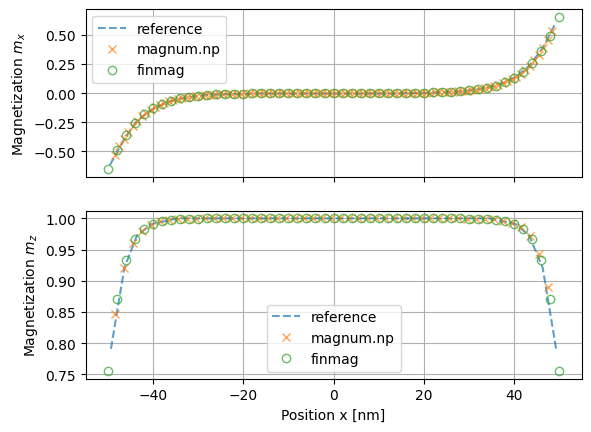

In [4]:
import matplotlib.pyplot as plt

magnumnp = np.loadtxt("data/m0_magnumnp.dat")
#magnumpi = np.loadtxt("data/m0_magnumpi.dat")
finmag = np.loadtxt("ref/m0_finmag.dat")

ref_x = np.loadtxt("ref/interfaceDMI_mx.dat")
ref_z = np.loadtxt("ref/interfaceDMI_mz.dat")

cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, (ax1,ax2) = plt.subplots(nrows=2, sharex=True)
ax1.plot(ref_x[:,0], ref_x[:,1], "--", color=cycle[0], alpha = 0.7, label = r"reference")
ax1.plot(magnumnp[1:-1,0]*1e9, magnumnp[1:-1,1], "x", color=cycle[1], alpha = 0.7, label = "magnum.np")
ax1.plot(finmag[::2,0]-50., finmag[::2,1], "o", mfc='none', color=cycle[2], alpha = 0.7,  label = "finmag")
ax1.set_ylabel("Magnetization $m_x$")

ax2.plot(ref_z[:, 0], ref_z[:,1], "--", color=cycle[0], alpha = 0.7, label = r"reference")
ax2.plot(magnumnp[1:-1:2,0]*1e9, magnumnp[1:-1:2,3], "x", color=cycle[1], alpha = 0.7, label = "magnum.np")
ax2.plot(finmag[::2,0]-50., finmag[::2,3], "o", mfc='none', color=cycle[2], alpha = 0.7, label = "finmag")
ax2.set_ylabel("Magnetization $m_z$")

for ax in ax1, ax2:
    ax.legend()
    ax.grid()
ax2.set_xlabel("Position x [nm]")
fig.savefig("data/results.png")